- Use census data to match probability.
- Create a new column that shows all possibilities and its probability.
- Create two other columns that are the top nationality and its probability.
- Create a bar chart data summary for across years.

### requirements for matching pipeline

In [191]:
# import library
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

In [1]:
# import census data with 1034722 entries
master_df = pd.read_csv('census_1910_manhattan.csv')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3050: DtypeWarning: Columns (37) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
# matching function
def nationality_distribution(last_name):
    result = list(master_df[(master_df['Surname']==last_name)]['Father\'s Birthplace']) + \
             list(master_df[(master_df['Surname']==last_name)]['Mother\'s Birthplace'])
    if result == []:
        return False
    distribution = Counter(result)
    for birthplace in distribution.keys():
        total = sum(distribution.values())
        #count = distribution[birthplace]
        probability = round(distribution[birthplace]/total,2)
        distribution[birthplace] = probability
        probability_max = max(distribution.values())
    for nationality, probability in distribution.items():
        if probability == probability_max:
            top_nationality = nationality
            top_probability = probability
    return distribution, top_nationality, top_probability

### algorithms
is there a more efficient way for nationality matching?
yes!! instead of matching each surname with census data, which means checking all rows in census data each time when i want to match one row in the business directories, i can instead create a table with summary results of the census data, because the people with the same last name will have the same nationality match and probability using our current pipeline, it would be more efficient if we match each row in the business directory with the census table summary. 

In [3]:
master_df.shape

(1034722, 46)

In [4]:
master_df.head(1)

,DataID,RecordId,Name,First Name,Middle Name,Surname,HouseHoldId,Street Name,House Number,Dwelling Number,...,Deaf and Dumb,Enumeration District Number,Ward of City,Street Name New,House Number New,Address,Lat,Lon,Full Occupation,Occupation Score
0,4450087_00350,18356998,Frank Collomeger,Frank,NaN,Collomeger,18356998,Twenty-First Street,224-6,10.0,...,False,972,18,21st street,225.0,21st street 225,NaN,NaN,Hotel Chef,33.06


In [5]:
master_df.columns

Index(['DataID', 'RecordId', 'Name', 'First Name', 'Middle Name', 'Surname',
       'HouseHoldId', 'Street Name', 'House Number', 'Dwelling Number',
       'Own or Rent', 'Relationship', 'Gender', 'Race', 'Age', 'Born Year',
       'Marital Status', 'Number of Years of Present Marriage',
       'Number of Children Born', 'Number of Children Living', 'Birthplace',
       'Father's Birthplace', 'Mother's Birthplace', 'US Born',
       'Immigration Year', 'Naturalization Status', 'Self Native Tongue',
       'Occupation', 'Industry', 'Self Employed or Not',
       'Out of Work on April 15', 'Number of Weeks Out of Work', 'Can Read',
       'Can Write', 'Attended School', 'Blind', 'Deaf and Dumb',
       'Enumeration District Number', 'Ward of City', 'Street Name New',
       'House Number New', 'Address', 'Lat', 'Lon', 'Full Occupation',
       'Occupation Score'],
      dtype='object')

In [6]:
surname_dict = dict(master_df['Surname'].value_counts())
len(surname_dict.keys())

175357

In [7]:
surname_list = list(surname_dict.keys())

In [8]:
firstname_dict = dict(master_df['First Name'].value_counts())
len(firstname_dict.keys())

50700

In [9]:
firstname_list = list(firstname_dict.keys())

In [10]:
# surname_nationality_count: {(surname, nationality): count}
surname_nationality_count = dict(master_df[['Surname', 'Father\'s Birthplace']].value_counts())

In [11]:
df_surname_nationality = pd.DataFrame.from_dict(data=surname_nationality_count, orient='index', columns=['count'])
df_surname_nationality.head(1)

,count
"(Cohen, Russia)",6528


In [12]:
#df_surname[('surname', 'nationality')] = df_surname.index
df_surname_nationality.reset_index(level=0, inplace=True)
df_surname_nationality.head(1)

,index,count
0,"(Cohen, Russia)",6528


In [13]:
df_surname_nationality['surname'] = df_surname_nationality['index'].str[0]
df_surname_nationality['nationality'] = df_surname_nationality['index'].str[1]
df_surname_nationality.head(1)

,index,count,surname,nationality
0,"(Cohen, Russia)",6528,Cohen,Russia


In [15]:
# surname_nationality_dict = {nationality1: prob1, nationality2: prob2}
surname_nationality_dict = {}
# surname_distribution_dict = {surname: surname_nationality_dict}
surname_distribution_dict = {}

surname_df = df_surname_nationality[df_surname_nationality['surname']=='Cohen']
surname_nationality = list(surname_df['nationality'])
surname_count = list(surname_df['count'])
n = len(surname_nationality)
for i in range(n):
    surname_nationality_dict[surname_nationality[i]] = surname_count[i]
surname_distribution_dict['Cohen'] = surname_nationality_dict

surname_distribution_dict

{'Cohen': {'Russia': 6528,
  'Austria': 725,
  'Romania': 365,
  'Germany': 149,
  'Hungary': 131,
  'Turkey': 105,
  'New York': 94,
  'England': 32,
  'Poland': 28,
  'Holland': 12,
  'Ireland': 12,
  'Syria': 7,
  'Pennsylvania': 4,
  'Virginia': 3,
  'Tennessee': 3,
  'Greece': 3,
  'Egypt': 3,
  'Africa': 3,
  'Ohio': 2,
  'New Jersey': 2,
  'Bohemia': 2,
  'Asia': 1,
  'Belgium': 1,
  'Galicia': 1,
  'Georgia': 1,
  'Jerusalem': 1,
  'Maryland': 1,
  'Michigan': 1,
  'Missouri': 1,
  'Spain': 1,
  'US': 1}}

In [49]:
pd.DataFrame(data={'surname': surname_distribution_dict.keys(),
                   'distribution': surname_distribution_dict.values(),
                   'top_match': list(surname_nationality_dict.keys())[0],
                   'top_prob': list(surname_nationality_dict.values())[0]/sum(surname_nationality_dict.values())})

,surname,distribution,top_match,top_prob
0,Cohen,"{'Russia': 6528, 'Austria': 725, 'Romania': 36...",Russia,0.793871


NO I WAS WRONG

census data has `1034722` unique entries, with a total of `175357` unique last names

the aggregated data from 1870 to 1933 altogether only has `15042` entries

so it is still faster running from restaurant data than from census data

In [ ]:
# surname_nationality_dict = {nationality1: prob1, nationality2: prob2}
surname_nationality_dict = {}
# surname_distribution_dict = {surname: surname_nationality_dict}
surname_distribution_dict = {}

for surname in surname_list:
    surname_df = df_surname_nationality[df_surname_nationality['surname']==surname]
    surname_nationality = list(surname_df['nationality'])
    surname_count = list(surname_df['count'])
    n = len(surname_nationality)
    for i in range(n):
        surname_nationality_dict[surname_nationality[i]] = surname_count[i]
    surname_distribution_dict[surname] = surname_nationality_dict

create two new dataframes from census data with columns: 
- "last name", "full distribution", "top_nationality"
- "first name", "full distribution", "top_nationality"

In [ ]:
full_distribution = []
top_nationality = []
top_probability = []
# apply function
for surname in surname_list:
    distribution, top_nation, top_prob = nationality_distribution(surname)
    full_distribution.append(distribution)
    top_nationality.append(top_nation)
    top_probability.append(top_prob)

In [ ]:
data = {'last_name': surname_list, 'full_distribution': full_distribution, 
        'top_nationality': top_nationality, 'top_probability': top_probability}

In [ ]:
surname_df = pd.DataFrame(data=data)
surname_df

In [ ]:
full_distribution_first = []
top_nationality_first = []
top_probability_first = []
# apply function
for firstname in firstname_list:
    distribution, top_nation, top_prob = nationality_distribution(firstname)
    full_distribution_first.append(distribution)
    top_nationality_first.append(top_nation)
    top_probability_first.append(top_prob)

In [ ]:
data_first = {'last_name': surname_list, 'full_distribution': full_distribution, 
              'top_nationality': top_nationality, 'top_probability': top_probability}

In [ ]:
firstname_df = pd.DataFrame(data=data_first)
firstname_df

### loading datasets

In [50]:
# use this library to read in all restaurant datasets
import glob

#specify a pattern of the file and pass it as a parameter into a glob function
excel_files = glob.glob('restaurant_datasets/*.xlsx')
#print a list of filenames
#print(excel_files)
 
#intialize empty list that we will append dataframes to
list_data = []

#write a for loop that will go through each of the file name through globbing and the end result will be the list of dataframes
for filename in excel_files:
    data = pd.read_excel(filename)
    list_data.append(data)

#print list_data which is a list of dataframes
#list_data
 
# since each dataset has similar format we can aggregate them and run them altogether
df_agg = pd.concat(list_data,ignore_index=True)
df_agg.head(1)

,ID,YR,DIR,PG,TYPE,NAME,ADDY,BOROUGH,CITY,STATE,...,Unnamed: 7,Unnamed: 8,ST_PREFIX,ST_SUFFIX,AdrMod,STNAME.3,STNAME.4,Unnamed: 17,tcch1 fiov!A-J wf0- l3,"0 t& t;,- /oS""V"
0,COPY DOWN Formula by clicking down on right co...,NaN,NaN,NaN,"they are all restaurants, unless they have a C...",NaN,COPY DOWN Formula by clicking down on right co...,Copy and paste,Copy and paste,Copy and paste,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
df_agg.shape

(18790, 33)

In [52]:
df_agg.isnull().sum()

ID                              6748
YR                              3748
DIR                             2774
PG                              2025
TYPE                            6709
NAME                            2023
ADDY                            2431
BOROUGH                         6544
CITY                            4152
STATE                           4152
HOUSENO                         2092
STNAME                          2046
STNAME.1                        7753
STNAME.2                       16332
Unnamed: 14                    18747
Unnamed: 15                    18773
..                             18204
Unnamed: 1                     18786
Unnamed: 2                     18783
Unnamed: 3                     18787
Unnamed: 4                     18789
Unnamed: 5                     18790
Unnamed: 6                     18788
Unnamed: 7                     18788
Unnamed: 8                     18790
ST_PREFIX                      17921
ST_SUFFIX                      15028
A

In [53]:
# we got some "dirty" data while combining and we need to clean it
# drop additional NaN columns in the end of datasets
df_agg = df_agg.drop(columns=['Unnamed: 14', 'Unnamed: 15', '..', 'Unnamed: 1', 'Unnamed: 2', 
                 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 
                 'Unnamed: 8', 'Unnamed: 17', 'tcch1  fiov!A-J     wf0- l3', '0 t& t;,- /oS"V'])

In [54]:
# drop rows with NaNs in YR because if YR=NaN that means it is the first row with annotations
df_agg = df_agg.dropna(subset=['YR'])
df_agg.head(1)

,ID,YR,DIR,PG,TYPE,NAME,ADDY,BOROUGH,CITY,STATE,HOUSENO,STNAME,STNAME.1,STNAME.2,ST_PREFIX,ST_SUFFIX,AdrMod,STNAME.3,STNAME.4
1,1,1885,Trow's,272,Restaurants,Abott Charles E.,109 Bleecker St.,Manhattan,New York,New York,109,Bleecker,St.,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df_agg.shape

(15042, 19)

In [57]:
#df_agg['first_name']=df_agg['NAME'].str.split().str[0]
df_agg['last_name']=df_agg['NAME'].str.split().str[0]
df_agg.head(1)

,ID,YR,DIR,PG,TYPE,NAME,ADDY,BOROUGH,CITY,STATE,HOUSENO,STNAME,STNAME.1,STNAME.2,ST_PREFIX,ST_SUFFIX,AdrMod,STNAME.3,STNAME.4,last_name
1,1,1885,Trow's,272,Restaurants,Abott Charles E.,109 Bleecker St.,Manhattan,New York,New York,109,Bleecker,St.,NaN,NaN,NaN,NaN,NaN,NaN,Abott


In [58]:
df_agg.to_csv('restaurant_datasets/1870_1933_aggregated.csv')

In [ ]:
#df_agg['census_match_full'] = df_agg['last_name'].apply(nationality_distribution).str[0]
#df_agg['census_match1'] = df_agg['last_name'].apply(nationality_distribution).str[1]
#df_agg['census_match1p'] = df_agg['last_name'].apply(nationality_distribution).str[2]
#df_agg.head()

In [158]:
df_agg_processed_last = pd.read_csv('restaurant_datasets/1870_1933_matched_last.csv', index_col=0)
df_agg_processed_last.head(1)

,ID,YR,DIR,PG,TYPE,NAME,ADDY,BOROUGH,CITY,STATE,...,STNAME.2,ST_PREFIX,ST_SUFFIX,AdrMod,STNAME.3,STNAME.4,last_name,census_match_full,census_match_1,census_match_1p
0,784,1910,Trow,826.0,Restaurant,Edwards Alice W.,130 W 57 St.,Manhattan,New York,New York,...,St.,NaN,NaN,130 W 57 St.,NaN,NaN,Edwards,"Counter({'Tennessee': 0.42, 'Ohio': 0.42, 'New...",Ohio,0.42


In [60]:
df_agg_processed_last.shape

(15042, 26)

In [61]:
df_agg_processed_last.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'ID', 'YR', 'DIR', 'PG',
       'TYPE', 'NAME', 'ADDY', 'BOROUGH', 'CITY', 'STATE', 'HOUSENO', 'STNAME',
       'STNAME.1', 'STNAME.2', 'ST_PREFIX', 'ST_SUFFIX', 'AdrMod', 'STNAME.3',
       'STNAME.4', 'last_name', 'census_match_full', 'census_match_1',
       'census_match_1p'],
      dtype='object')

In [157]:
df_agg_processed_last = df_agg_processed_last[['ID', 'YR', 'DIR', 'PG',
       'TYPE', 'NAME', 'ADDY', 'BOROUGH', 'CITY', 'STATE', 'HOUSENO', 'STNAME',
       'STNAME.1', 'STNAME.2', 'ST_PREFIX', 'ST_SUFFIX', 'AdrMod', 'STNAME.3',
       'STNAME.4', 'last_name', 'census_match_full', 'census_match_1',
       'census_match_1p']]
df_agg_processed_last.head(1)

,ID,YR,DIR,PG,TYPE,NAME,ADDY,BOROUGH,CITY,STATE,...,STNAME.2,ST_PREFIX,ST_SUFFIX,AdrMod,STNAME.3,STNAME.4,last_name,census_match_full,census_match_1,census_match_1p
0,784,1910,Trow,826.0,Restaurant,Edwards Alice W.,130 W 57 St.,Manhattan,New York,New York,...,St.,NaN,NaN,130 W 57 St.,NaN,NaN,Edwards,"Counter({'Tennessee': 0.42, 'Ohio': 0.42, 'New...",Ohio,0.42


### summary statistics
- how many (percentage) entries did not return results?
- nationality distribution through years

In [69]:
NULL = df_agg_processed_last.isnull().sum()['census_match_full']
TOTAL = df_agg_processed_last.shape[0]
print(f'{round(NULL/TOTAL*100,2)}% of the entries did not yield results')

32.14% of the entries did not yield results


In [72]:
df_agg_last_dict = dict(df_agg_processed_last.groupby('YR')['census_match_1'].value_counts())
df_agg_last_dict

{('1870', 'New York'): 89,
 ('1870', 'Russia'): 53,
 ('1870', 'Germany'): 50,
 ('1870', 'Ireland'): 40,
 ('1870', 'Austria'): 20,
 ('1870', 'Virginia'): 10,
 ('1870', 'England'): 9,
 ('1870', 'Massachusetts'): 9,
 ('1870', 'Georgia'): 8,
 ('1870', 'Hungary'): 8,
 ('1870', 'Italy'): 8,
 ('1870', 'New Jersey'): 7,
 ('1870', 'Pennsylvania'): 7,
 ('1870', 'South Carolina'): 6,
 ('1870', 'West Indies'): 6,
 ('1870', 'North Carolina'): 5,
 ('1870', 'Scotland'): 5,
 ('1870', 'Switzerland'): 5,
 ('1870', 'DC'): 4,
 ('1870', 'France'): 4,
 ('1870', 'Romania'): 4,
 ('1870', 'Canada'): 3,
 ('1870', 'Connecticut'): 3,
 ('1870', 'Delaware'): 3,
 ('1870', 'Denmark'): 3,
 ('1870', 'Ohio'): 3,
 ('1870', 'Texas'): 3,
 ('1870', 'Vermont'): 3,
 ('1870', 'Florida'): 2,
 ('1870', 'Luxembourg'): 2,
 ('1870', 'New Hampshire'): 2,
 ('1870', 'Sweden'): 2,
 ('1870', 'Barbados'): 1,
 ('1870', 'California'): 1,
 ('1870', 'Kentucky'): 1,
 ('1870', 'Maine'): 1,
 ('1870', 'Maryland'): 1,
 ('1870', 'Michigan'): 1,
 (

In [96]:
def convert_nationality(region):
    if (region=='New York') or (region=='Pennsylvania') or (region=='West Indies')\
    or (region=='Virginia') or (region=='New Jersey') or (region=='South Carolina')\
    or (region=='Georgia') or (region=='Colorado') or (region=='Ohio')\
    or (region=='Tennessee') or (region=='Rhode Island') or (region=='Indiana')\
    or (region=='Connecticut') or (region=='Michigan') or (region=='Maine')\
    or (region=='Maryland') or (region=='North Carolina ') or (region=='Florida')\
    or (region=='DC') or (region=='Kentucky') or (region=='Massachusetts')\
    or (region=='New Hampshire') or (region=='Louisiana') or (region=='California')\
    or (region=='Iowa') or (region=='Missouri') or (region=='Illinois')\
    or (region=='US') or (region=='Barbados') or (region=='Texas') or (region=='North Carolina')\
    or (region=='Vermont') or (region=='Delaware') or (region=='Canada'):
        return 'American'
    elif (region=='Russia') or (region=='Hungary') or (region=='Romania')\
    or (region=='Poland') or (region=='Bohemia'):
        return 'Eastern European'
    elif (region=='Germany') or (region=='Austria') or (region=='Scotland'):
        return 'Germanic'
    elif (region=='Ireland') or (region=='England'):
        return 'British'
    elif (region=='Italy') or (region=='Spain') or (region=='Greece'):
        return 'Southern European'
    elif (region=='France') or (region=='Switzerland') or (region=='Holland') or (region=='Luxembourg'):
        return 'Western European'
    elif (region=='Sweden') or (region=='Finland') or (region=='Norway') or (region=='Denmark'):
        return 'Scandinavian' 
    elif (region=='China'):
        return 'Asian'
    elif (region=='Turkey'):
        return 'Middle Eastern'
    else:
        return 'False'

In [141]:
def convert_year(year):
    if len(year)==4:
        return int(year)
    else:
        return int(year[:4])

In [171]:
df_last_count['nationality'] = df_last_count['birthplace'].apply(convert_nationality)
df_last_count['year'] = df_last_count['year'].apply(convert_year)
df_last_count.head(1)

,index,count,year,birthplace,nationality
0,"(1870, New York)",89,1870,New York,American


In [97]:
# dict to df
df_last_count = pd.DataFrame.from_dict(data=df_agg_last_dict, orient='index', columns=['count'])
# reset index
df_last_count.reset_index(level=0, inplace=True)
# split dict keys to two cols
df_last_count['year'] = df_last_count['index'].str[0]
df_last_count['birthplace'] = df_last_count['index'].str[1]
# inspect df
df_last_count.head(1)

,index,count,year,birthplace
0,"(1870, New York)",89,1870,New York


In [144]:
test = df_last_count[df_last_count['year']==1870].groupby('nationality').sum().sort_values(by='count', ascending=False)
test

,count,year
nationality,,
American,181,48620
Germanic,75,5610
Eastern European,65,5610
British,49,3740
Western European,11,5610
Southern European,8,1870
Scandinavian,5,3740


([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

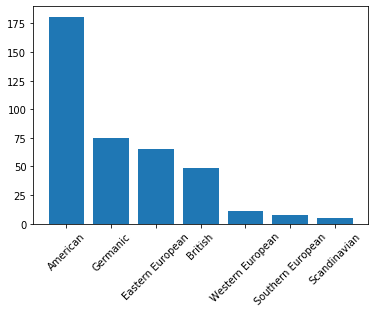

In [132]:
y = list(test['count'])
x = list(test.index)
plt.bar(x=x, height=y)
plt.xticks(rotation=45)

In [145]:
test2 = df_last_count[df_last_count['nationality']=='Germanic'].groupby('year').sum()
test2

,count
year,
1870,75
1885,16
1890,253
1895,321
1905,564
1910,604
1915,116
1920,181
1925,172


([<matplotlib.axis.XTick at 0x126ad48b0>,
 <a list of 11 Text xticklabel objects>)

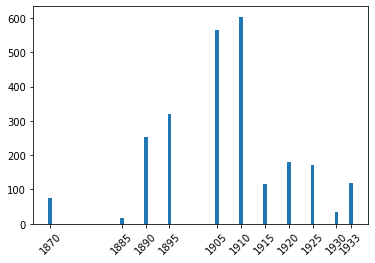

In [147]:
y = list(test2['count'])
x = list(test2.index)
plt.bar(x=x, height=y)
plt.xticks(x, rotation=45)

In [175]:
set(df_last_count['year'])

{'1870',
 '1885.0',
 '1890',
 '1890.0',
 '1895',
 '1905',
 '1905.0',
 '1910',
 '1915',
 '1915.0',
 '1920.0',
 '1925.0',
 '1930.0',
 '1933'}

In [149]:
set(df_last_count['nationality'])

{'American',
 'Asian',
 'British',
 'Eastern European',
 'False',
 'Germanic',
 'Middle Eastern',
 'Scandinavian',
 'Southern European',
 'Western European'}

In [183]:
df_agg_last_dict = dict(df_agg_processed_last.groupby('YR')[
                        'census_match_1'].value_counts())
# df_last_count.columns = ['index', 'count', 'year', 'birthplace', 'nationality']
df_last_count = pd.DataFrame.from_dict(
    data=df_agg_last_dict, orient='index', columns=['count'])
df_last_count.reset_index(level=0, inplace=True)
df_last_count['year'] = df_last_count['index'].str[0]
df_last_count['year'] = df_last_count['year'].apply(convert_year)
df_last_count['birthplace'] = df_last_count['index'].str[1]
df_last_count['nationality'] = df_last_count['birthplace'].apply(
    convert_nationality)

# get list of years and nationalities
years = list(set(df_last_count['year']))
nationalities = list(set(df_last_count['nationality']))

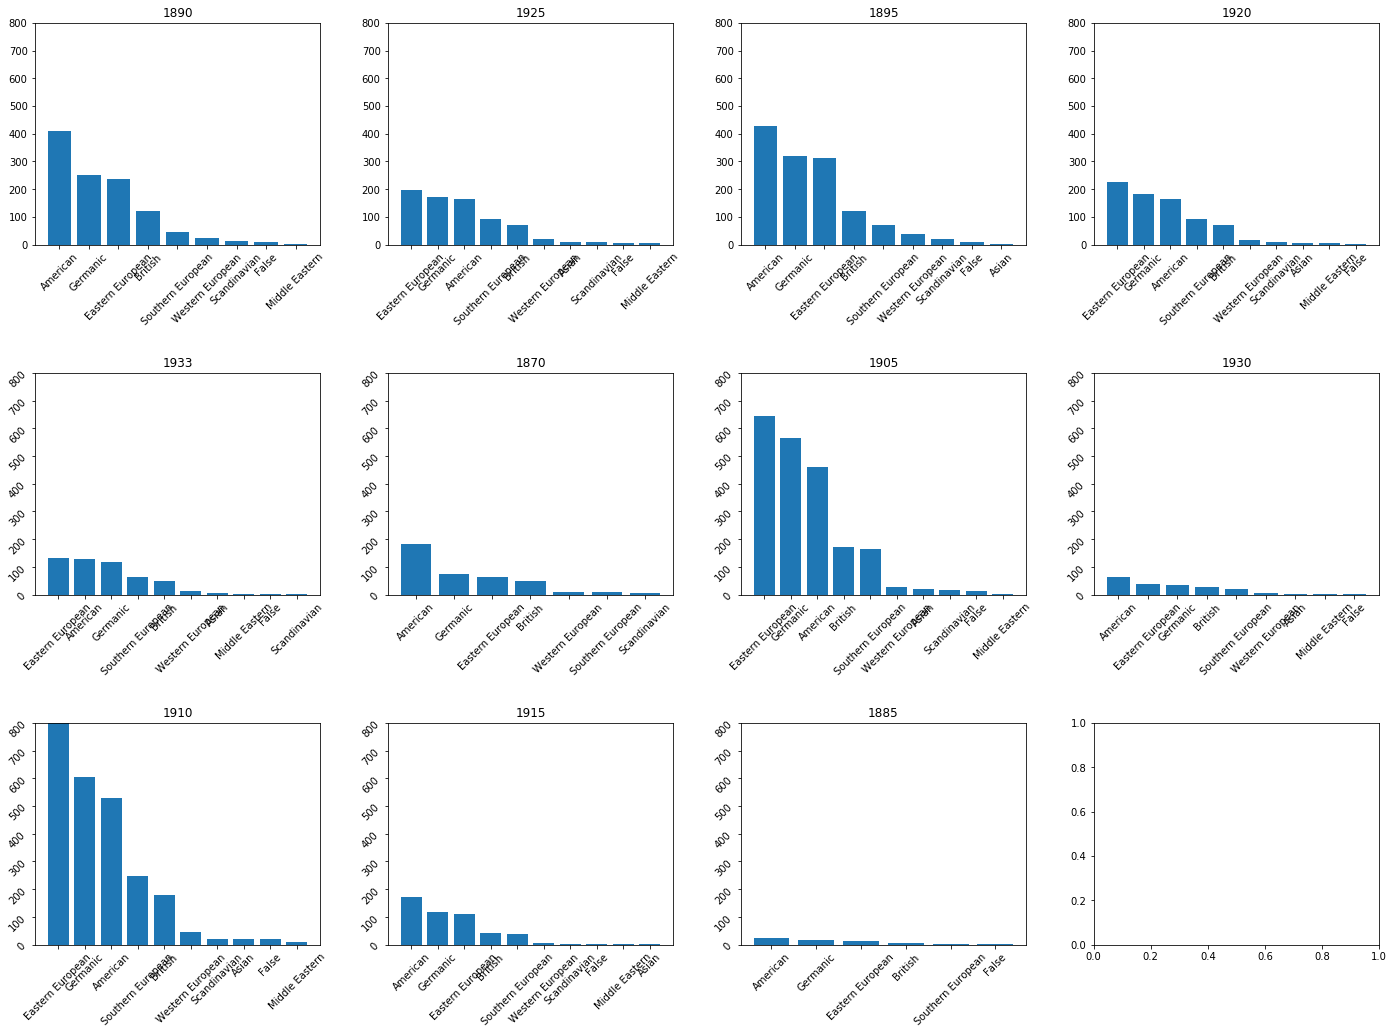

In [195]:
# nationalities distribution each year

fig, ax = plt.subplots(3, 4, figsize=(20, 15))

for i in range(len(years)):
    nationality_count = df_last_count[df_last_count['year'] == years[i]].groupby(
        'nationality').sum().sort_values(by='count', ascending=False)
    y = list(nationality_count['count'])
    x = list(nationality_count.index)
    x_loc = np.arange(len(x))
    if i < 4:  # k=1-4
        ax[0, i-1].bar(x=x, height=y)
        #ax[0, i-1].set_xticks(x_loc)
        ax[0, i-1].set_xticklabels(x, rotation=45)
        ax[0, i-1].set_title(f'{years[i]}')
        ax[0, i-1].set_ylim(0, 800)
    elif i < 8:  # k=5-8
        ax[1, i-5].bar(x=x, height=y)
        ax[1, i-5].tick_params(labelrotation=45)
        ax[1, i-5].set_title(f'{years[i]}')
        ax[1, i-5].set_ylim(0, 800)
    else:  # k=9-12
        ax[2, i-8].bar(x=x, height=y)
        ax[2, i-8].tick_params(labelrotation=45)
        ax[2, i-8].set_title(f'{years[i]}')
        ax[2, i-8].set_ylim(0, 800)
fig.tight_layout(pad=3.0)
plt.savefig(f'plots/nationalities_distribution_year.png')

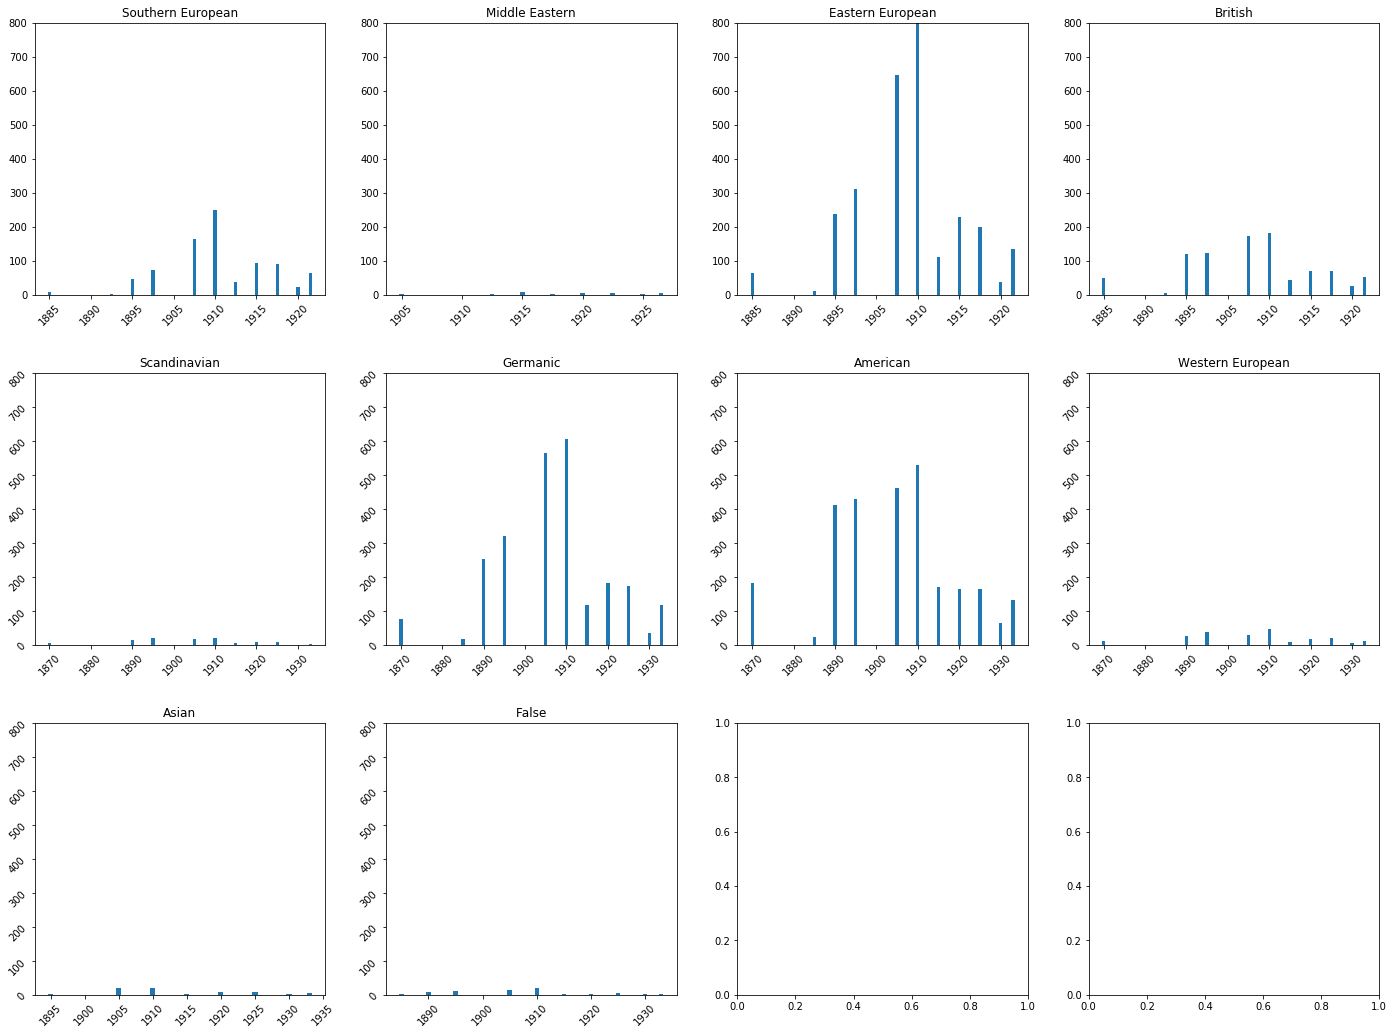

In [201]:
# single nationality counts each year
fig, ax = plt.subplots(3, 4, figsize=(20, 15))

for i in range(len(nationalities)):
    year_count = df_last_count[df_last_count['nationality']==nationalities[i]].groupby('year').sum()
    y = list(year_count['count'])
    x = list(year_count.index)
    if i < 4:  # k=1-4
        ax[0, i-1].bar(x=x, height=y)
        #ax[0, i-1].set_xticks(x_loc)
        ax[0, i-1].set_xticklabels(x, rotation=45)
        ax[0, i-1].set_title(f'{nationalities[i]}')
        ax[0, i-1].set_ylim(0, 800)
    elif i < 8:  # k=5-8
        ax[1, i-5].bar(x=x, height=y)
        ax[1, i-5].tick_params(labelrotation=45)
        ax[1, i-5].set_title(f'{nationalities[i]}')
        ax[1, i-5].set_ylim(0, 800)
    else:  # k=9-12
        ax[2, i-8].bar(x=x, height=y)
        ax[2, i-8].tick_params(labelrotation=45)
        ax[2, i-8].set_title(f'{nationalities[i]}')
        ax[2, i-8].set_ylim(0, 800)
fig.tight_layout(pad=3.0)
plt.savefig(f'plots/nationality_distribution_year.png')    